# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# For training and testing the data
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## Load the data
- Create a copy to use for data manipulation

In [2]:
# Load the data - original data set
customers = pd.read_csv('ExtraaLearn.csv')

In [3]:
# create a copy of the data set to work with
df = customers.copy()

## Data Overview

- Observations
- Sanity checks

- View the first and last five rows of the data

In [4]:
#check that the data is loaded and to look at the dataframe
df.head()

ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activity                No                No            No   
2  Website Activity                No                No           Yes   
3  Website Activity                No                No            No   
4    Email Activity                No                No            No   

  educational_channels referral  status  
0                   No       No       1  
1                  Yes       No       0  
2                   No       No       0  
3                   No       No       1  
4                   No       No       0

In [5]:
# check the data last five rows
df.tail()

ID  age current_occupation first_interaction profile_completed  \
4607  EXT4608   35         Unemployed        Mobile App            Medium   
4608  EXT4609   55       Professional        Mobile App            Medium   
4609  EXT4610   58       Professional           Website              High   
4610  EXT4611   57       Professional        Mobile App            Medium   
4611  EXT4612   55       Professional           Website            Medium   

      website_visits  time_spent_on_website  page_views_per_visit  \
4607              15                    360                 2.170   
4608               8                   2327                 5.393   
4609               2                    212                 2.692   
4610               1                    154                 3.879   
4611               4                   2290                 2.075   

         last_activity print_media_type1 print_media_type2 digital_media  \
4607    Phone Activity                No                No            No   
4608    Email Activity                No                No            No   
4609    Email Activity                No                No            No   
4610  Website Activity               Yes                No            No   
4611    Phone Activity                No                No            No   

     educational_channels referral  status  
4607                  Yes       No       0  
4608                   No       No       0  
4609                   No       No       1  
4610                   No       No       0  
4611                   No       No       0

In [6]:
df.shape

(4612, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [8]:
# find number of unique IDs
df.ID.nunique()

4612

#### There are **4612 unique IDs**.  Each row is a unique ID therefore this column doesn't add value and can be dropped

In [9]:
# drop the ID column
df = df.drop(['ID'], axis = 1)

In [10]:
# look at the first five rows again
df.head()

age current_occupation first_interaction profile_completed  website_visits  \
0   57         Unemployed           Website              High               7   
1   56       Professional        Mobile App            Medium               2   
2   52       Professional           Website            Medium               3   
3   53         Unemployed           Website              High               4   
4   23            Student           Website              High               4   

   time_spent_on_website  page_views_per_visit     last_activity  \
0                   1639                 1.861  Website Activity   
1                     83                 0.320  Website Activity   
2                    330                 0.074  Website Activity   
3                    464                 2.057  Website Activity   
4                    600                16.914    Email Activity   

  print_media_type1 print_media_type2 digital_media educational_channels  \
0               Yes                No           Yes                   No   
1                No                No            No                  Yes   
2                No                No           Yes                   No   
3                No                No            No                   No   
4                No                No            No                   No   

  referral  status  
0       No       1  
1       No       0  
2       No       0  
3       No       1  
4       No       0

In [11]:
df.shape

(4612, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

#### Observations
- There are **4612 rows and 14 columns**
- There is **1 float types** (page_views_per_visit)
- There are **4 integer types** (age, website_visits, time_spent_on_website,and status(0 not converted or 1 converted)
- There are **9 object types**
- There are **no null values** in the data 
- There are **4612 unique IDs**.  Each row is a unique ID therefore this column did not add value and was dropped

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Univariate Data Analysis

### Summary of all data columns

In [13]:
# get a summary of the data
df.describe(include = 'all').T

count unique             top  freq        mean  \
age                    4612.0    NaN             NaN   NaN   46.201214   
current_occupation       4612      3    Professional  2616         NaN   
first_interaction        4612      2         Website  2542         NaN   
profile_completed        4612      3            High  2264         NaN   
website_visits         4612.0    NaN             NaN   NaN    3.566782   
time_spent_on_website  4612.0    NaN             NaN   NaN  724.011275   
page_views_per_visit   4612.0    NaN             NaN   NaN    3.026126   
last_activity            4612      3  Email Activity  2278         NaN   
print_media_type1        4612      2              No  4115         NaN   
print_media_type2        4612      2              No  4379         NaN   
digital_media            4612      2              No  4085         NaN   
educational_channels     4612      2              No  3907         NaN   
referral                 4612      2              No  4519         NaN   
status                 4612.0    NaN             NaN   NaN    0.298569   

                              std   min      25%    50%      75%     max  
age                     13.161454  18.0     36.0   51.0     57.0    63.0  
current_occupation            NaN   NaN      NaN    NaN      NaN     NaN  
first_interaction             NaN   NaN      NaN    NaN      NaN     NaN  
profile_completed             NaN   NaN      NaN    NaN      NaN     NaN  
website_visits           2.829134   0.0      2.0    3.0      5.0    30.0  
time_spent_on_website  743.828683   0.0   148.75  376.0  1336.75  2537.0  
page_views_per_visit     1.968125   0.0  2.07775  2.792  3.75625  18.434  
last_activity                 NaN   NaN      NaN    NaN      NaN     NaN  
print_media_type1             NaN   NaN      NaN    NaN      NaN     NaN  
print_media_type2             NaN   NaN      NaN    NaN      NaN     NaN  
digital_media                 NaN   NaN      NaN    NaN      NaN     NaN  
educational_channels          NaN   NaN      NaN    NaN      NaN     NaN  
referral                      NaN   NaN      NaN    NaN      NaN     NaN  
status                    0.45768   0.0      0.0    0.0      1.0     1.0

#### Identify the percentage and count of each group within the categorical variables

#### Percentage

In [14]:
# Making a list of all categorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing percnetage of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize = True))
    print("-" * 50)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
--------------------------------------------------
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
--------------------------------------------------
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
--------------------------------------------------
No     0.84

#### Count of each group within the categorical variables

In [15]:
# Making a list of all categorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize = False))
    print("-" * 50)

Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     4085
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
No     3907
Yes     705
Name: educational_channels, dtype: int64
--------------------------

### Observations
#### Categorical Data
- <code>current_occupation</code> - there are 3 responses allowed 
-- **Professional is the top with 2616 (57%)**
- <code>first_interaction</code> - there are 2 responses allowed
-- **Website is the top with 2542 (55%)**
- <code>profile_completed</code> - there are 3 possible 
-- **High is the top with 2264 (49%)**
- <code>last_activity</code> -  there are 3 responses
-- **Email Activity is the top with 2278 (49%)**
- <code>print_media_type1</code> - there are 2 responses
-- **No is the top with 4115 (89%) (not seen the Newspaper Ad)**
- <code>print_media_type2</code> - there are 2 responses
-- **No is the top with 4379 (94%) (not seen the Magazine Ad)**
- <code>digital_media</code> - there are 2 responses
-- **No is the top with 4085 (89%) (not seen an ad on the digital platforms)**
- <code>educational_channels</code> - there are 2 responses
-- **No is the top with 3907(85%) (not heard of ExtraaLearn via online forums, educ websites or discussion threads...)**
- <code>referral</code> - there are 2 responses
-- **No is the top with 4519 (98%) (not referred)**
#### Numeric Data
- <code>age</code> The mean age is 46.2 with the range from 18 to 63 years.
- <code>website_visits</code> The mean number of website visits are 3.566782 with a range from 0 to 30 visits.  75% of the visitors visit up to 5 times. An outlier may be present.
- <code>time_spent_on_website</code> The mean time spent was 743.828683 with a range from 0 to 2537. 75% of the visitors spent only up to 1336.75 
- <code>page_views_per_visit</code> The mean page views were 3.026126 pages with a range from 0 to 18.434.  75% of the viewers viewed up to 3.75625 pages. An outlier may be present.

### Status
#### How many of the visitors are converted to customers

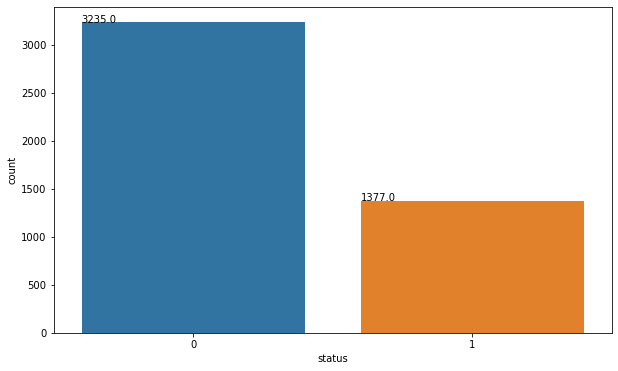

In [16]:
#create a bar chart to determine the number of visitors which are converted to customers (1)
plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'status', data = df)

# Place the exact count on the top of the bar for each category using annotate
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

### Observation Summary
The majority of the visitors are professionals (56.7%).  The website (55%) is the primary first interaction with ExtraaLearn.  Only 2% of the visitors have a low completion of the profile. Email (49%) is the highest last activity of the visitor.  Very few visitors have had interactions with ExtraaLearn through advertisements or referrals seen the newspaper ads (10%),  magazine ads (5%), digital media (11%), educational channels (15%) or have been referred (2%).

Only **1377 (approx 30%)** from a total of 4612 visitors are converted to customers.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Distributions and Outliers
#### Create count plots to identify the distribution of the data
#### Create box plots to determine if there are any outliers in the data.

age
The skew is : -0.72


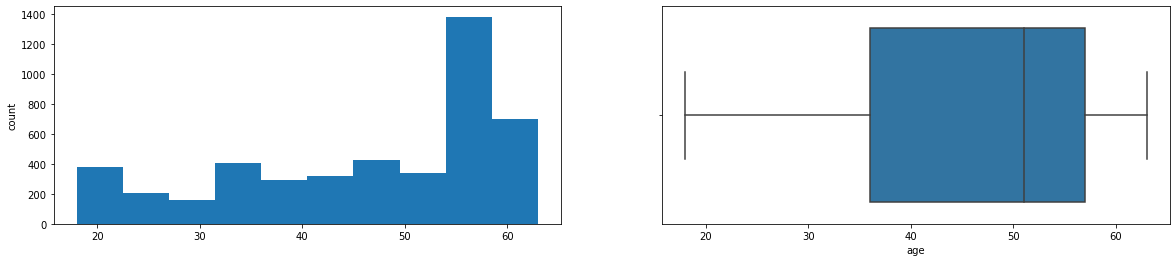

website_visits
The skew is : 2.16


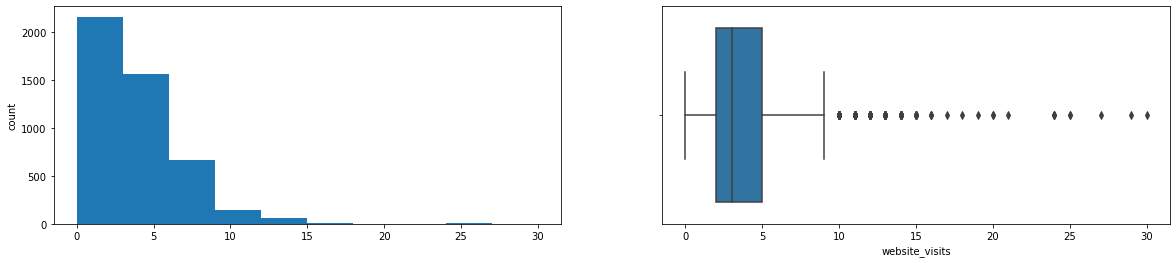

time_spent_on_website
The skew is : 0.95


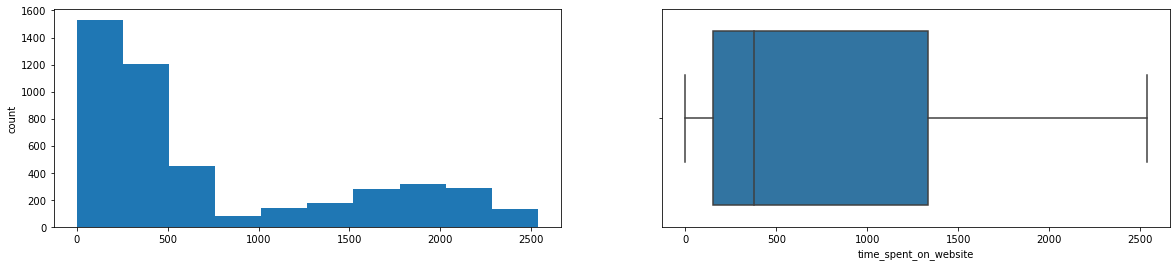

page_views_per_visit
The skew is : 1.27


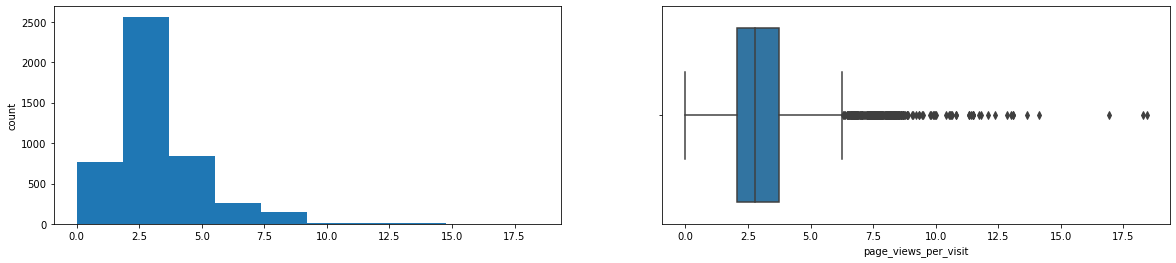

In [17]:
#create countplots and box plots to visualize data to identify the distribution and outliers

for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)
    
    print('The skew is :',round(df[col].skew(), 2))
    
    plt.figure(figsize = (20, 4))
# histogram    
    plt.subplot(1, 2, 1)
    df[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
#box plot    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
   
    plt.show()


### Observations 
<code>age</code>
There is a negative skew (-0.72) with most visitors approx 55 years of age.  
<code>website_visits</code>
There is positive skew (2.16) with highest frequency visiting from 0 to 5 times decreasing from there. **The box plot shows outliers.**
<code>time_spent_on_website</code>
There is a positive skew (0.95) with the highest frequency visitors spending between 0 and 250 on the site.  
<code>page_views_per_visit</code>
There is a positive skew (1.27) with the highest frequency of page views between 2.5 and 5.  **The box plot shows outliers.**


### Identifying outliers
- defined a function <code>find_outliers_IQR</code> which takes in a dataframe as an input and returns a dataframe as an output.  The returned data frame contains the outliers as numerical values and others as NaN
- identified the outliers: lower limit < q1 - 1.5 * IQR and higher limit > q3 + 1.5 * IQR

In [18]:
# defining the definition to identify outliers 
def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR)))]
    return outliers

In [19]:
#identifying the outliers for the website_visits

outliers = find_outliers_IQR(df['website_visits'])

print('website_visits number of outliers: ' + str(outliers.count()))

print('website_visits min outlier value: ' + str(outliers.min()))

print('website_visits max outlier value: ' + str(outliers.max()))

outliers

website_visits number of outliers: 154
website_visits min outlier value: 10
website_visits max outlier value: 30


6       13
31      13
32      12
66      25
201     14
        ..
4566    13
4571    12
4583    24
4589    16
4607    15
Name: website_visits, Length: 154, dtype: int64

In [20]:
#identifying the outliers for the page_views_per_visit

outliers = find_outliers_IQR(df['page_views_per_visit'])

print('page_views_per_visit number of outliers: ' + str(outliers.count()))

print('page_views_per_visit min outlier value: ' + str(outliers.min()))

print('page_views_per_visit max outlier value: ' + str(outliers.max()))

outliers

page_views_per_visit number of outliers: 257
page_views_per_visit min outlier value: 6.313
page_views_per_visit max outlier value: 18.434


4       16.914
32      18.434
47       7.050
110      7.364
121      6.887
         ...  
4470     6.810
4507     6.822
4514     7.997
4572     7.397
4597     8.246
Name: page_views_per_visit, Length: 257, dtype: float64

## Bivariate Data Analysis
- Will continue exploring the data to identify any relationships between the various variables. 

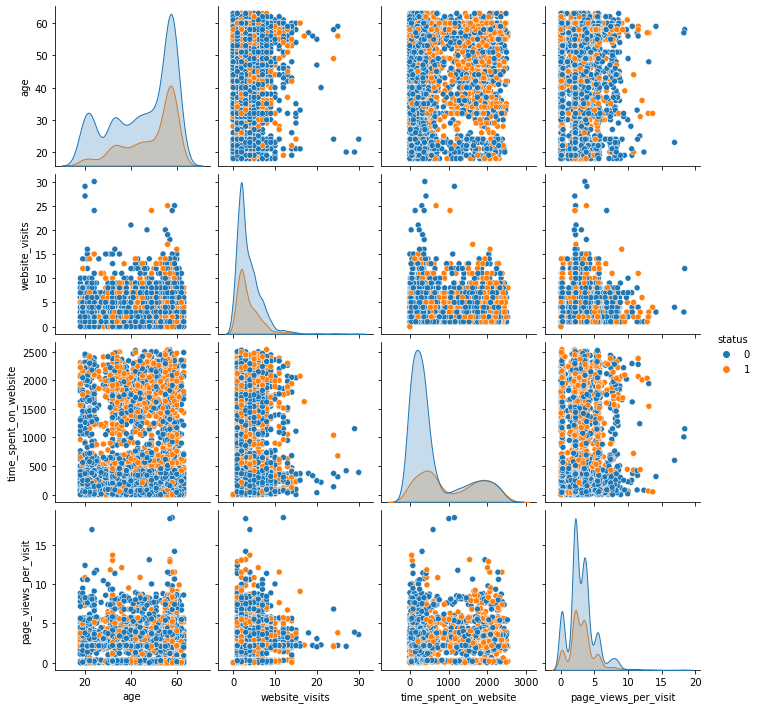

In [21]:
# create a pair plot to see if there are any relationships 
# distingueished the paiplot by adding the status as an additional parameter for the pairplot
sns.pairplot(df, hue ='status')


### Pairplot Summary
Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.
The color represents if the visitor was converted to a customer or not.  Orange shows those that are now customers.

- Older visitors are more likely to become customers.
- Those visitors that spend more time on the website are more likely to become customers. 
There were no other major trends identified by the pairplot.

### <code>age</code>

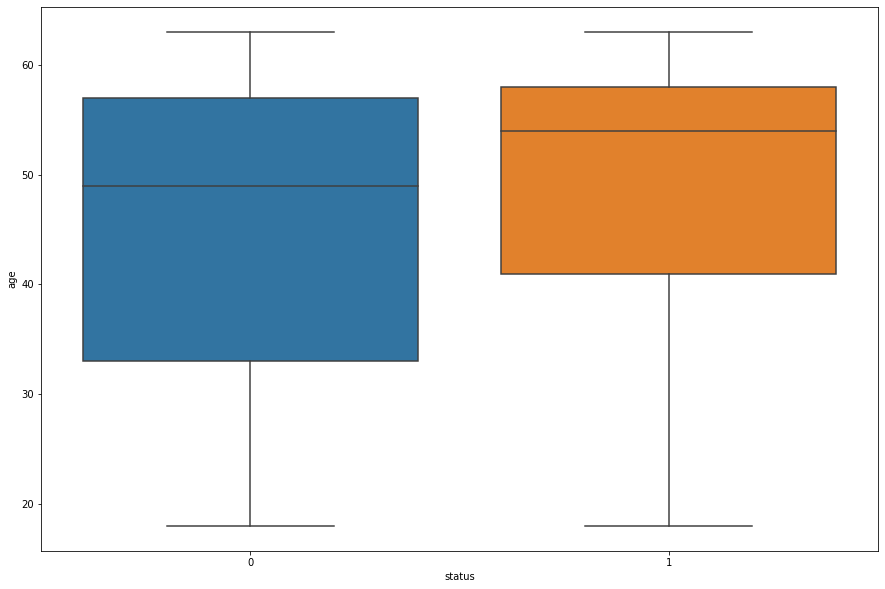

In [22]:
#visualize what the age means for creating a paying customer
plt.figure(figsize = (15, 10))
sns.boxplot(df["status"], df["age"])
plt.show()

### <code>current_occupation</code>
Analyze the data based on the <code>current_occupation</code>.
- Identify the number of visitors based on <code>current_occupation</code>
- Identify the number of visitors which where converted based on <code>current_occupation</code>
- Look at the age of the visitors based on their <code>current_occupation</code>

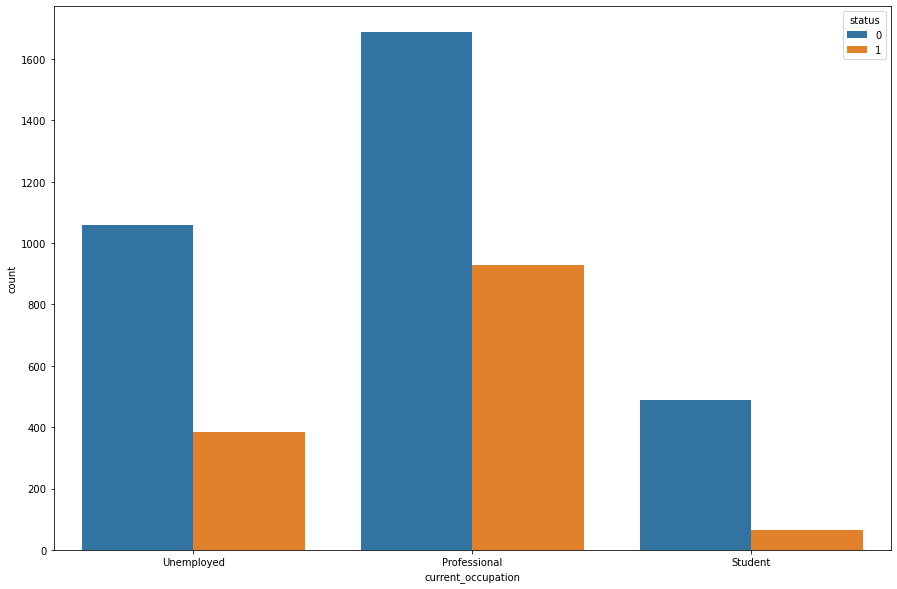

In [23]:
# visualize the current occupations of the visitors based on conversion
plt.figure(figsize = (15, 10))
sns.countplot(x = 'current_occupation', hue = 'status', data = df)
plt.show()

In [24]:
#look at the age of the visitor by current occupation
df.groupby(["current_occupation"])["age"].describe()

count       mean       std   min   25%   50%   75%   max
current_occupation                                                           
Professional        2616.0  49.347477  9.890744  25.0  42.0  54.0  57.0  60.0
Student              555.0  21.144144  2.001114  18.0  19.0  21.0  23.0  25.0
Unemployed          1441.0  50.140180  9.999503  32.0  42.0  54.0  58.0  63.0

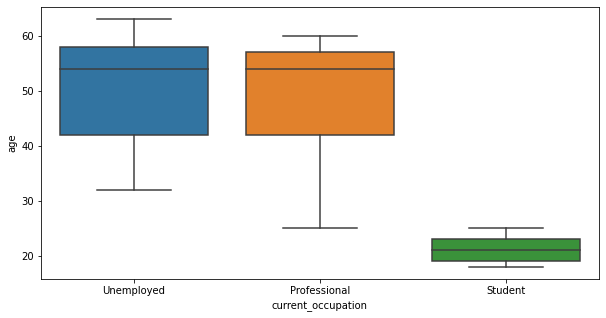

In [25]:
# box plots of the age of the visitor grouped by the current occupation
plt.figure(figsize = (10, 5))
sns.boxplot(df["current_occupation"], df["age"])
plt.show()

### <code>first_interactions</code>

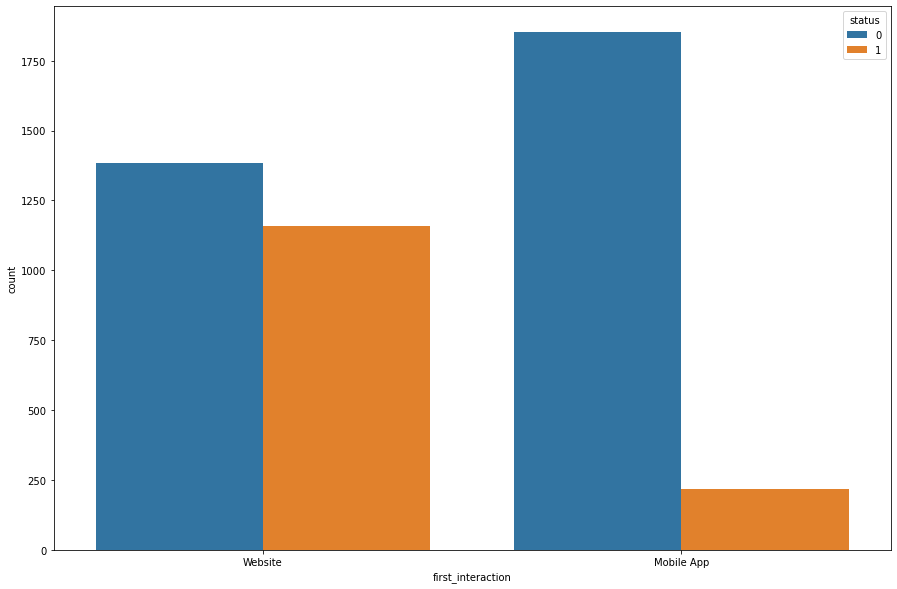

In [26]:
# visualize the first_interactions of the visitors based on conversion
plt.figure(figsize = (15, 10))
sns.countplot(x = 'first_interaction', hue = 'status', data = df)
plt.show()

### <code>time_spent_on_website</code>

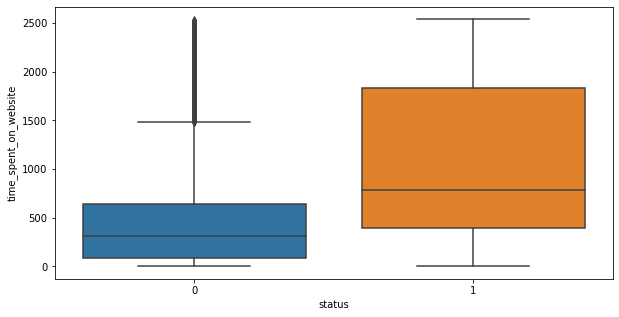

In [27]:
# visualize the time_spent_on_website of the visitors based on conversion
plt.figure(figsize = (10, 5))
sns.boxplot(df["status"], df["time_spent_on_website"])
plt.show()

### <code>profile_completed</code>

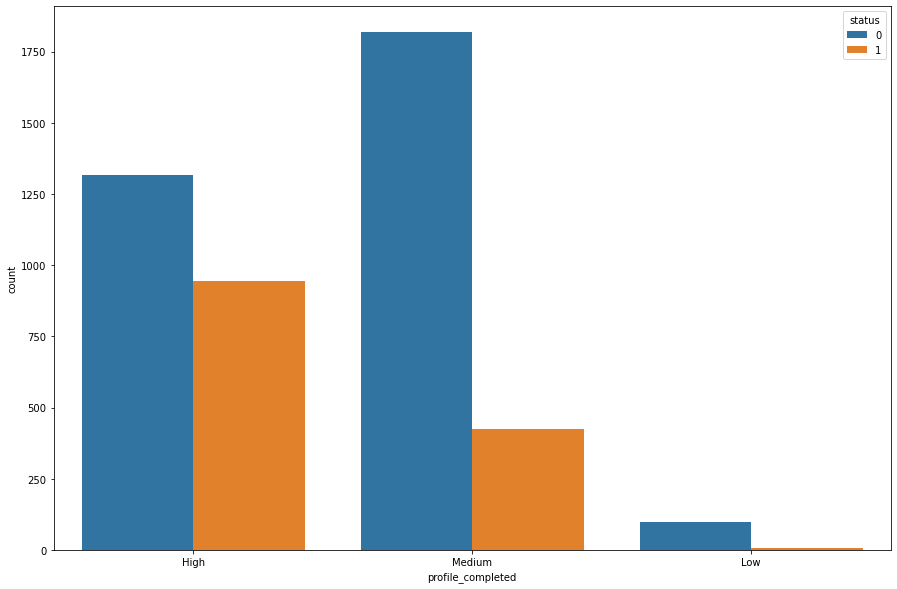

In [28]:
#visualize what the completion of the profile means for creating a paying customer
plt.figure(figsize = (15, 10))
sns.countplot(x = 'profile_completed', hue = 'status', data = df)
plt.show()

### <code>referral</code>

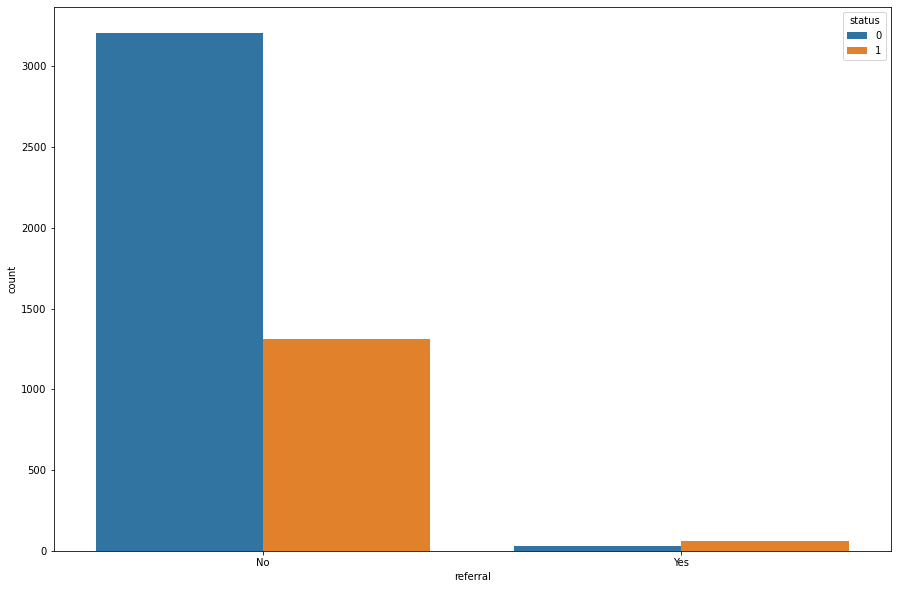

In [29]:
#visualize what a referral means for creating a paying customer
plt.figure(figsize = (15, 10))
sns.countplot(x = 'referral', hue = 'status', data = df)
plt.show()

### Observations
- <code>age</code>
- Visitors that are higher in age have a higher propensity to become a paying customer.
- <code>current_occupation</code>
- Professionals visit the site more than unemployed and students.
- Professionals are also more likely to become paying customers
- Students are the youngest demographic with the mean being 21.  The max age of the student is <=25.  
- The youngest professional is 25 (same age as the max student).
- The professionals range from 25 - 60 years.  The Unemployed range from 32 to 63 years. 
- <code>first_interactions</code>
- More visitors first interaction is through the Mobile App, however there is a low conversion rate.  Those whose first interaction is through the website, have more which become customers.
- <code>time_spent_on_website</code>
-the blue represents those that did not convert to paying customers.  
- It appears that the visitors which spend more time on the Website have more of a chance to convert to paying customers.
- <code>profile_completed</code>
- It appears that those that have a high completion have the highest tendency to become paying customers.
- <code>referral</code>
- There were very few referral (2%) however they have a high percentage of conversion to paying customers.  It might be fair to say that if a person is referred to ExtraaLearn they will become a paying customer.


### Correlation Heat Map

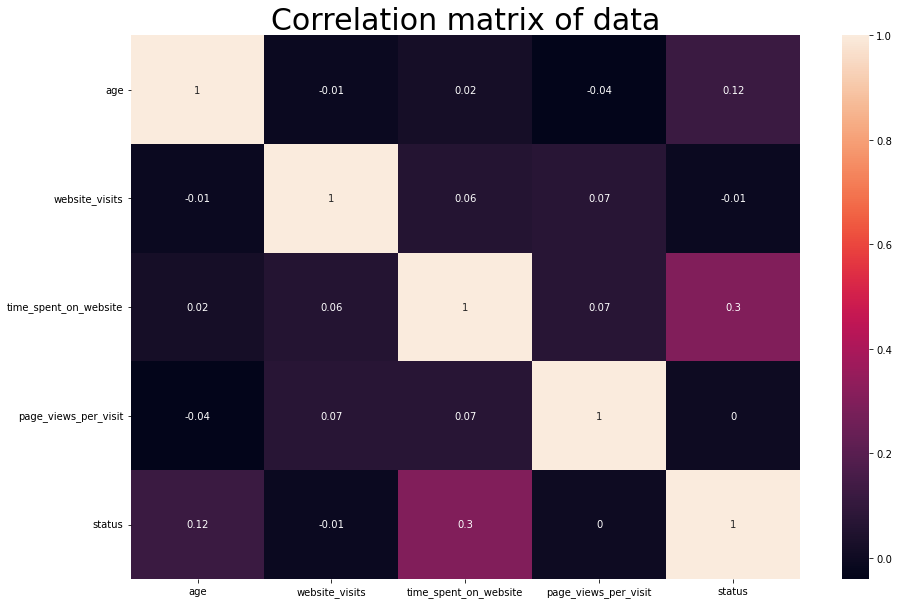

In [30]:
# Correlation matrix (no grouping)
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().round(2),annot=True)
plt.title('Correlation matrix of data',fontsize = 30)
plt.show()

### Correlations Summary
- The **highest correlation** is between <code>time_spent_on_website</code> and <code>status</code>
- The other variables have no noticeable correlation
- There is a negative correlation between the <code>website_visits</code> and <code>status</code>

## Model Preparation
**To determine which variable will lead to a visitor conversion to a paying customer**
- 1. encode the data 
- 2. check the shape of the training and testing sets

### Encoding the data

In [31]:
# Separating the target variable and other variables

# make a copy called X which is a dataframe with "status" column removed
X = df.drop(columns = 'status') 

# Y is a series containing the "status" (column)
Y = df['status'] 

In [32]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
#pd.get_dummies => working on X dataframe converts all categorical variables into binary 1(yes) / 0(no).

X = pd.get_dummies(X, drop_first = True)

In [33]:
# Splitting the data into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## Shape 
- Check the shape of the trainng and test sets of data after manipulation

In [34]:
print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
0    0.704151
1    0.295849
Name: status, dtype: float64
Percentage of classes in the test set:
0    0.695087
1    0.304913
Name: status, dtype: float64


## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a visitor will not convert to a paying customer but in reality, the visitor would convert to a paying customer.
2. Predicting a visitor will convert to a paying customer but in reality, the visitor does not convert to a paying customer. 

**Which case is more important?** 
* False Negatives: Predicting a visitor will not convert to a paying customer but in reality, the visitor would convert to a paying customer:

* If we predict that a visitor will not convert to a paying customer and would have converted to a paying customer, then the company has **lost on potential revenue for the company.**  (False Negative)

* If we predict that a visitor will convert to a paying customer and they do not, the company has lost the resource of time and effort, where they could have been working with other potential customers.  (False Positive)  

**The number of False Negatives should be minimized.**

**How to reduce the losses?**

* Want to maximize the <code>Recall</code> which will reduce the number of false negatives thereby not missing the visitors that will become paying customers


**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [35]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

## Building a Decision Tree model

- Fit the decision tree classifier on the training data (use random_state=7)
- Check the performance on both training and testing datasets (use metrics_score function)

In [36]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state = 7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

- Let's check the performance on the training data

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



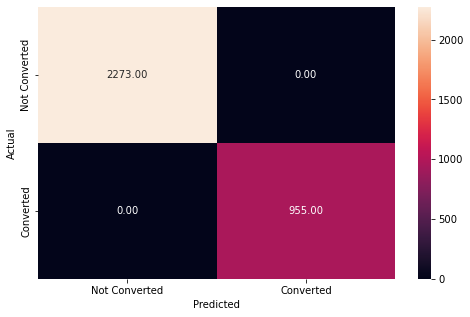

In [37]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

#### Observations: 
Reading confusion matrix (clockwise):

- True Positive: Predicting the lead will not convert the booking and the lead does not convert.
- False Positive: Predicting the lead will not convert and the lead is converted.
- True Negative: Predicting the lead will convert to a paid customer and the lead does convert.
- False Negative: Predicting the lead will convert to a paid customer but the lead does not converted.

There is no error on the training set, i.e., each sample has been classified.

The model this perfectly on the training data, it is likely overfitted.

- Let's check the performance on test data to see if the model is overfitting.

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



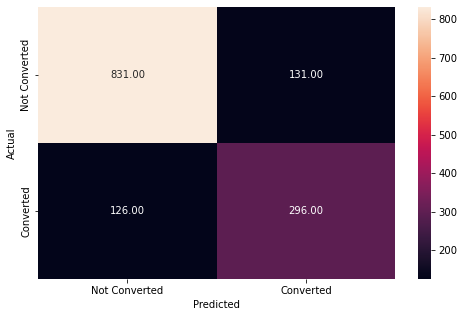

In [38]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

### Observations:
  
- The model did not fit as well on the test data. Therefore the model is overfitting the training data. 

- To reduce overfitting the model let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is **approximately** the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [39]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), #depth [2, 3, 4, 5, 6, 7, 8, 9]
              'criterion': ['gini', 'entropy'], #use both gini and entropy to measure split quality
              'min_samples_leaf': [5, 10, 20, 25] #minimum number of samples to be a leaf node
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search 
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5) #=> chooses the best hyperparameters to use

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, let's check the model performance on the training and testing data.

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



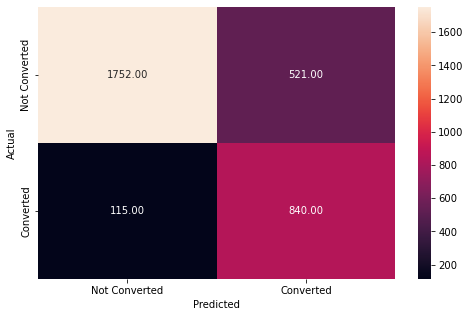

In [40]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

### Observations
- The performance on the training data has decreased which can be expected as we are trying not to overfit the training dataset. 

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



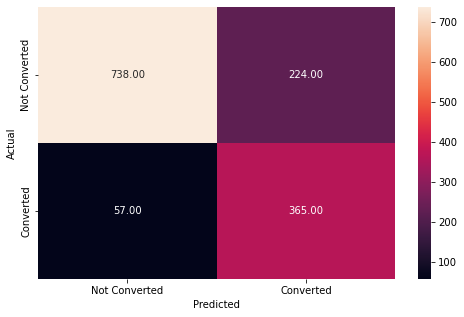

In [41]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

### Observations
- The tuned model has an testing f1-score of 72% and is no longer overfitteing and generalizes well.
- The model has increased its recall to 86% which is well above precision.
- Would like to increase general accuracy while maintaining similar racall to precision ratio.

**Let's visualize the tuned decision tree and observe the decision rules:**

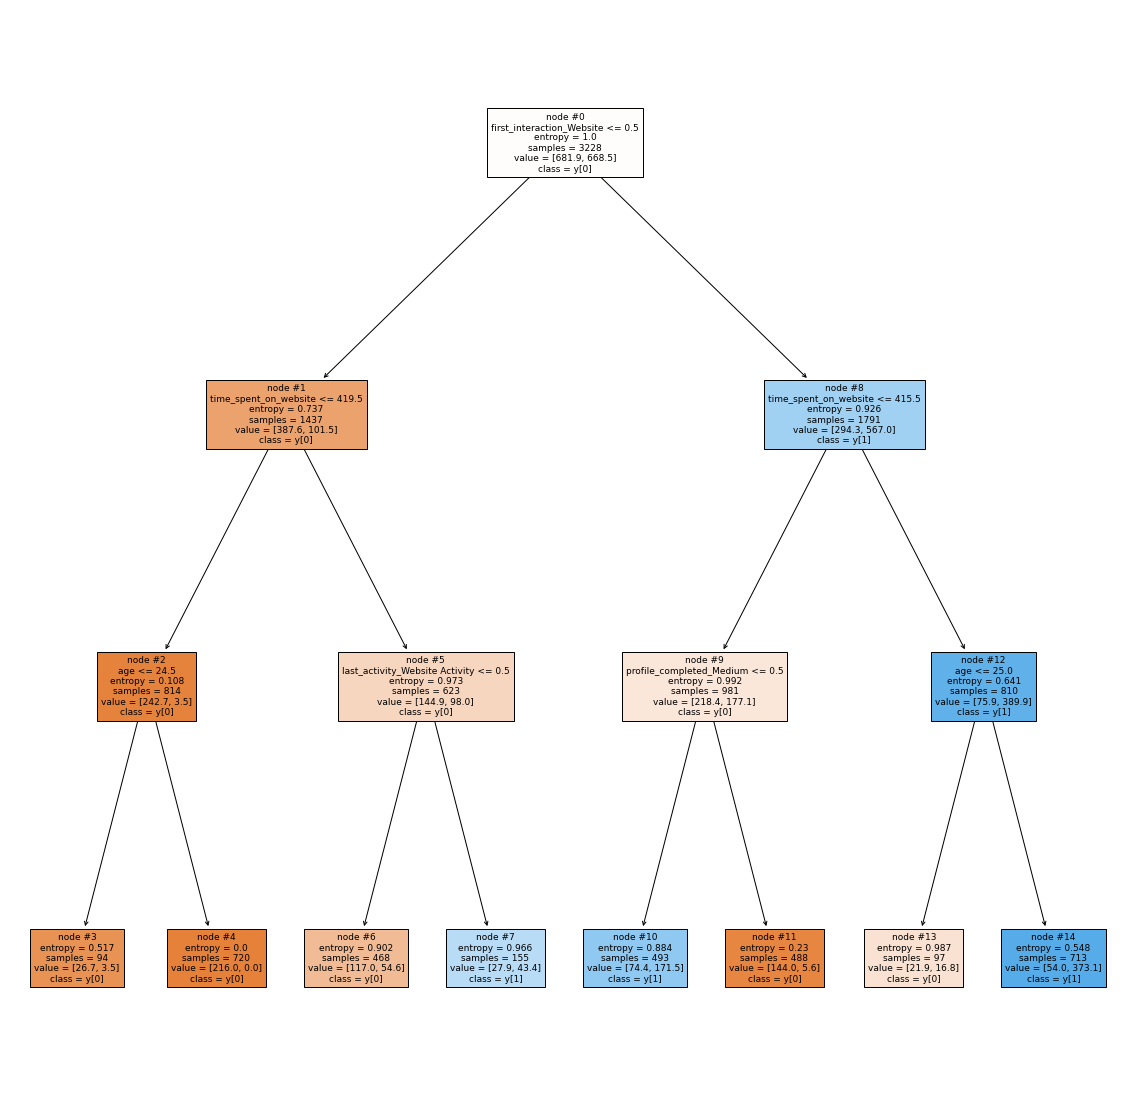

In [42]:
#Visualize the tree
features = list(X.columns)
plt.figure(figsize = (20, 20))
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

**Blue represents those who converted to paying customers class = y[1]**

**Orange represents those who did not convert to paying customers class = y[0]**

### Observations
- First split is on <code>first_interaction</code> which implies it is one of the most important features (as observed in EDA). 
- Visitors who first interacted with the website versus the mobile app had a much higher conversion rate.

- Second split is on <code>time_spent_on_website</code> (highlighted in correlation heatmap). 
- Visitors who spend more time on the website have a higher chance of converting to paying customers.

- Third split is has <code>age</code> represented twice, under each prior branch. Therefore it seems to be of importance. It was noticed that visitors >= 25 had  a higher chance of converting to paying customers.
- If a visitor is <25 and did not spend a lot of time on the website then they do not have a high chance of becoming paying customers.

**Let's look at the feature importance** of the tuned decision tree model

In [43]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
time_spent_on_website             0.348142
first_interaction_Website         0.327181
profile_completed_Medium          0.239274
age                               0.063893
last_activity_Website Activity    0.021511
website_visits                    0.000000
page_views_per_visit              0.000000
current_occupation_Student        0.000000
current_occupation_Unemployed     0.000000
profile_completed_Low             0.000000
last_activity_Phone Activity      0.000000
print_media_type1_Yes             0.000000
print_media_type2_Yes             0.000000
digital_media_Yes                 0.000000
educational_channels_Yes          0.000000
referral_Yes                      0.000000


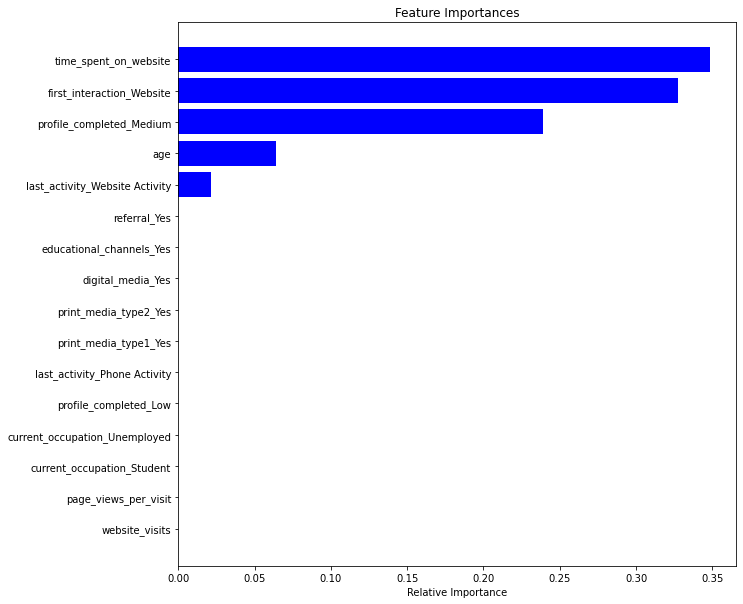

In [44]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'blue', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations
- There are **5 features** which are of **importance** in order:

<code>time_spent_on_website</code>

<code>first_interaction</code> (Website)

<code>profile_completed</code> (Medium)

<code>age</code>

<code>last_activity</code> (Website Activity)

- The other features (variables) have no impact

## Building a Random Forest model

### Random Forest Classifier
- Fit the random forest classifier on the training data (use random_state = 7)
- Check the performance on both training and testing data (use metrics_score function)

In [45]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=7,criterion="entropy")

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



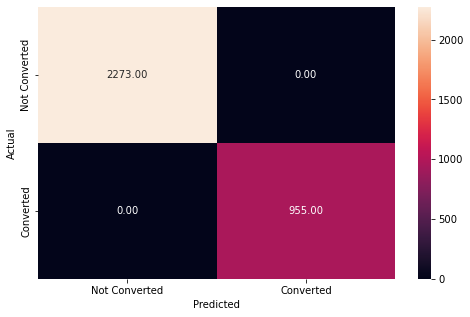

In [46]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

### Observations:

- Similar to the decision tree, the random forest is giving a perfect/better performance on the training data.
- The model is most likely overfitting to the training dataset as we observed for the decision tree.
- Let's confirm this by checking its performance on the testing data

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.83      1384
weighted avg       0.86      0.86      0.86      1384



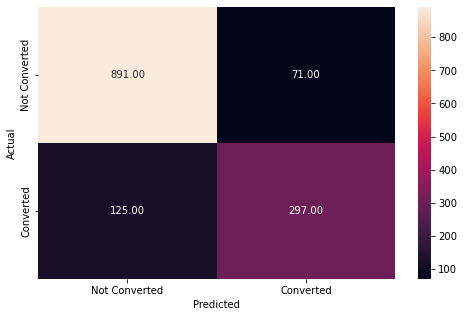

In [47]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

### Observations:

- Comparatively, the results from random forest classifier were decent on both training and testing data.
- The model is back to being overfitted, not surprising given we are using a unrestrained random forest.
- It has higher F1_Score and the precision on the testing data. The recall is lower, the opposite of our goal.

**Let's see if we can get a better model by tuning the random forest classifier**

## Random Forest Classifier - Hyperparameter Tuning Model

- Let's try tuning some of the important hyperparameters of the Random Forest Classifier.

- We will not tune the criterion hyperparameter as we know from hyperparameter tuning for decision trees that entropy is a better splitting criterion for this data.

In [48]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

In [49]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2273
           1       0.80      0.78      0.79       955

    accuracy                           0.88      3228
   macro avg       0.86      0.85      0.85      3228
weighted avg       0.88      0.88      0.88      3228



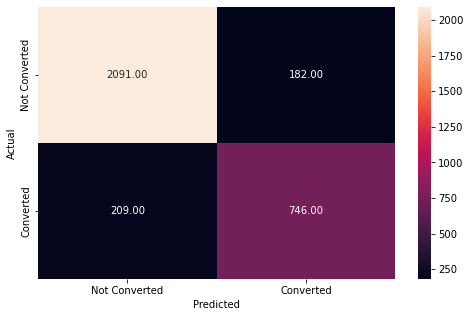

In [50]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned_base.predict(X_train)

metrics_score(y_train, y_pred_train4)

### Observations:

- We can see that after hyperparameter tuning, the model is performing poorly on the train data as well.
- We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get better performance.

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       962
           1       0.79      0.73      0.76       422

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



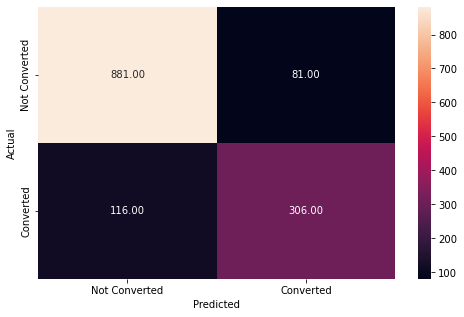

In [51]:
# Checking performance on the training data
y_pred_test4 = rf_estimator_tuned_base.predict(X_test)

metrics_score(y_test, y_pred_test4)

### Observations

- While less than before the model is slightly overfitted 

- The precision continues to be higher than the recall, something we will need to improve upon to surpass our tuned model.

- The overall accuracy is slightly higher than that of our tuned model suggesting that using a random forest is the correct option.

### Random Forest Classifier - Hyperparameter Tuning Model 2
- Try and increase performance and prioritize recall over precision

In [52]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5

grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

Let's check the performance of the tuned model

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



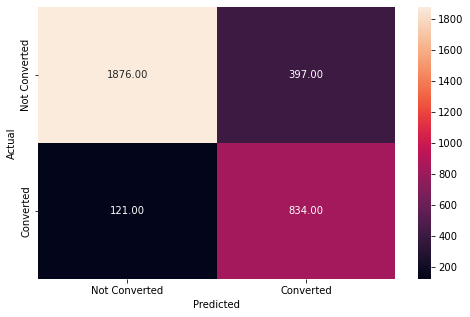

In [53]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

Let's check the model performance on the test data

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



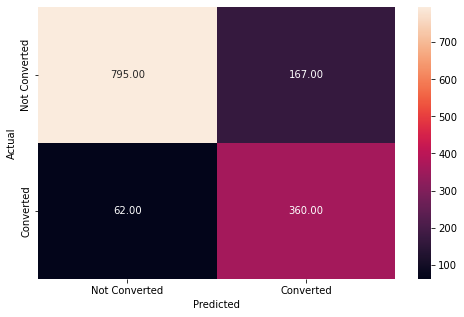

In [54]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

### Observations:

- The model is no longer overfitted with a testing f1-score of 76% (equal to to the training accuracy), meaning it will generalize well.
- The recall is near the highest at 85%, well above the precision of 68%. This is inline with our goals of reducing false negatives.
- While the recall of the tuned model is slightly higher at 86%, the model is overall weaker with an f1-score of 72%.

## Feature Importance - Random Forest

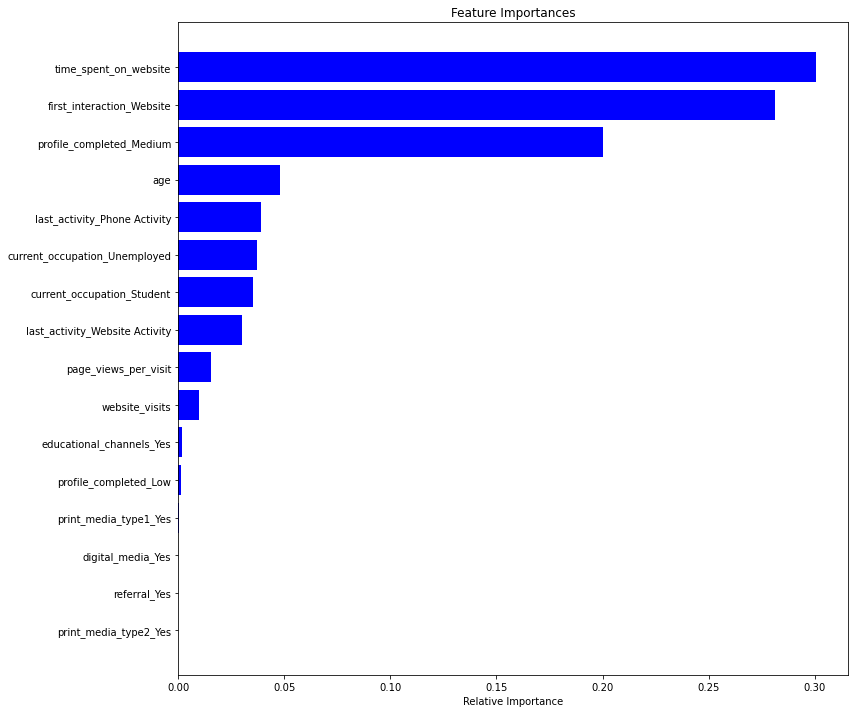

In [55]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'blue', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### Observations:

- Similar to the decision tree model, time spent on website, first_interaction_website, profile_completed, and age are the top four features that help distinguish between not converted and converted leads.
- Unlike the decision tree, the random forest gives some importance to other variables like occupation, page_views_per_visit, as well. This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## Actionable Insights and Recommendations

**Goal**

The goal was to maximize the Recall value. The higher the Recall score, the greater chances of **minimizing the False Negatives**.  
False Negatives: Predicting a visitor will not convert to a paying customer but in reality, the visitor would convert to a paying customer, therefore the business losing revenue.

**Process**

- The data was loaded into the Notebook.
- An exploratory data analysis was performed to identify missing values, outliers, preparing the data for analysis, reviewing univariate and bivariate data analysis and visualizing the variables.   
- A decision tree based model and a random forest model were created which can predict if a visitor is likely to be converted to a paid customer. 
- This can be used by the company to predict which visitors are likely to be converted to paying customers thereby plan their marketing strategies
- Training and Testing sets were created and run to determine the best model fit.

_Two models performed very well:_
1. Tuned Model - recall 86%, f1-score 72% and macro average 82%

2. Hyper Tuned Random Forest Model - recall 85%, f1-score 76% and macro average 84%

## Conclusions:

**Model Recommendation**

The **Hyper Tuned Random Forest Model** is recommended for future use as it had a 4% overall improvement. It is also giving the highest Recall score of 85% and the macro average of 84% on the test data.

- The **Decision Tree Model** only recognized 5 features as important.  
- The **Random Forest Model** also recognized 7 additional features which had some impact (some very small)

**4 Most Important Features identified by both models**

<code>time_spent_on_website</code>

<code>first_interaction</code> (Website)

<code>profile_completed</code> (Medium)

<code>age</code>

**Business Recommendations**

ExtraaLearn's Representatives should prioritize visitors based on:
1. The visitors <code>time_spent_on_website</code>.
- This was the top feature for both models on determining if a visitor would convert to a paying customer or not.  

2. The visitors <code>first_interaction</code> on the website.
- If a visitors first interaction was on the website instead of the app they were more like to become paying customers.  Therefore this should be another point for the representatives to pay attention to when deciding on the amount of time to dedicate to a visitor.

3. The visitors <code>profile_completed</code>
- If the visitor has been identified as a medium for the completion of the profile they are more likely to convert to a paying customer.  

4. The visitors <code>age</code>
- If a visitor is within the identified age of 45 - 55 years then they are more likely to convert to becoming a paying customer.   

- Visitors which meet these criteria as demonstrated in order ExtraaLearn will be able to decide where to focus their time when talking with new visitors.  
- This will allow the business to make better use of their time when pursuing and converting leads into paying customers.
